<a href="https://colab.research.google.com/github/jyotsna2411/bci-motor-imagery-classification/blob/main/bci-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
# Connecting to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.2 MB/s eta 0:00:00


In [4]:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import shutil
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os

In [6]:
subject = 1 # use data from subject 1
runs =[14]

files = eegbci.load_data(subject, runs, './eeg-motor-movementimagery-dataset/files/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()

KeyboardInterrupt: 

In [ ]:
raws

[<RawEDF | S010R03.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>]

In [ ]:
 raw_obj=raw_obj.crop(tmin=18, tmax=20)
events, event_ids = mne.events_from_annotations(raw_obj)

# Print the labels
print(event_ids)

Used Annotations descriptions: ['T0']
{'T0': 1}


In [5]:
!dir "/content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files"

64_channel_sharbrough-old.png  S007  S018  S029  S040  S051  S062  S073  S084  S095  S106
64_channel_sharbrough.pdf      S008  S019  S030  S041  S052  S063  S074  S085  S096  S107
64_channel_sharbrough.png      S009  S020  S031  S042  S053  S064  S075  S086  S097  S108
ANNOTATORS		       S010  S021  S032  S043  S054  S065  S076  S087  S098  S109
RECORDS			       S011  S022  S033  S044  S055  S066  S077  S088  S099  SHA256SUMS.txt
S001			       S012  S023  S034  S045  S056  S067  S078  S089  S100  wfdbcal
S002			       S013  S024  S035  S046  S057  S068  S079  S090  S101
S003			       S014  S025  S036  S047  S058  S069  S080  S091  S102
S004			       S015  S026  S037  S048  S059  S070  S081  S092  S103
S005			       S016  S027  S038  S049  S060  S071  S082  S093  S104
S006			       S017  S028  S039  S050  S061  S072  S083  S094  S105


In [6]:
file_list=["S001","S002","S003","S004","S005","S006","S007","S008","S009","S010","S011","S012","S013","S014","S015","S016","S017","S018","S019","S020","S021","S022","S023","S024","S025","S026","S027","S028","S029","S030","S031","S032","S033","S034","S035","S036","S037","S038","S039","S040","S041","S042","S043","S044","S045","S046","S047","S048","S049","S050","S051","S052","S053","S054","S055","S056","S057","S058","S059","S060","S061","S062","S063","S064","S065","S066","S067","S068","S069","S070","S071","S072","S073","S074","S075","S076","S077","S078","S079","S080","S081","S082","S083","S084","S085","S086","S087","S088","S089","S090","S091","S092","S093","S094","S095","S096","S097","S098","S099","S100","S101","S102","S103","S104","S105","S106","S107","S108","S109"]

In [7]:

import glob


In [8]:
data_dir='/content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files'

raw_data_list = []
count=1
for participant_dir in file_list:
  if count == 1260:
          break
  if participant_dir.startswith("S") and participant_dir[-1].isdigit():
    participant_path=data_dir + "/" + participant_dir
    files = glob.glob(participant_path + '/*')
    for filename in files:

      # Check if filename starts with "s" and ends with a number (".edf")
      if filename.endswith(".edf"):
        edf_path= filename
        # Read the EDF data using mne
        raw = mne.io.read_raw_edf(edf_path, preload=True)

        # Append the raw data object to the list
        raw_data_list.append({filename:raw})
        print(count)
        count+=1
        if count == 1260:
          break



Extracting EDF parameters from /content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
1
Extracting EDF parameters from /content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
2
Extracting EDF parameters from /content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
3
Extracting EDF parameters from /content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 

KeyboardInterrupt: 

In [9]:
raw_sample=raw_data_list[0]['/content/drive/My Drive/eeg-motor-movementimagery-dataset-1.0.0/files/S001/S001R07.edf']

Using matplotlib as 2D backend.


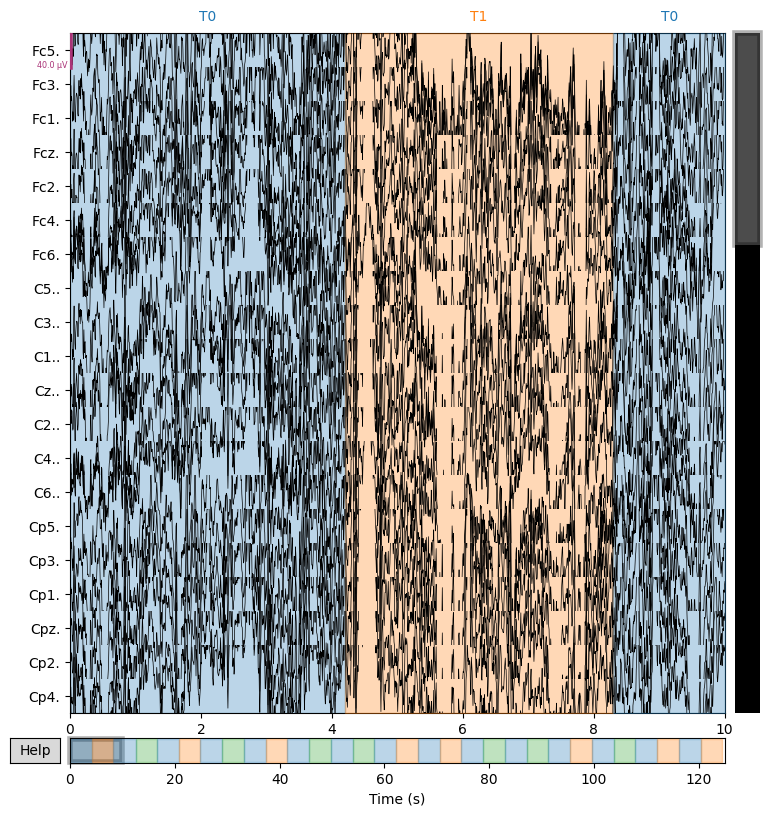

In [10]:
raw_sample.plot();

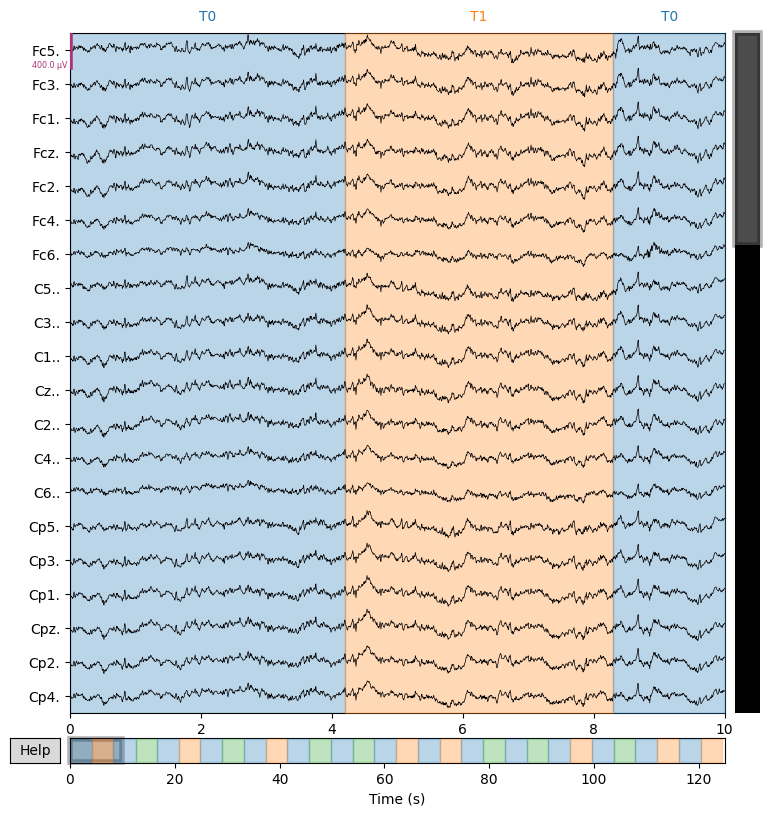

In [11]:
raw_sample.plot(scalings = dict(eeg=200e-6));

In [12]:
raw_sample.info['sfreq']

160.0

In [13]:
print(raw_sample._data.shape)

(64, 20000)


In [14]:
print(raw_sample._data[15, :])

[-6.8e-05 -4.9e-05 -3.4e-05 ...  0.0e+00  0.0e+00  0.0e+00]


In [15]:
raw_sample.describe()

<RawEDF | S001R07.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fc5.  EEG   µV      -249.00     -36.00      -1.00      32.00     343.00
 1  Fc3.  EEG   µV      -253.00     -32.00       1.00      34.00     282.00
 2  Fc1.  EEG   µV      -268.00     -33.00       1.00      35.00     272.00
 3  Fcz.  EEG   µV      -267.00     -34.00       2.00      37.00     291.00
 4  Fc2.  EEG   µV      -292.00     -32.00       2.00      36.00     287.00
 5  Fc4.  EEG   µV      -294.00     -28.00       2.00      33.00     263.00
 6  Fc6.  EEG   µV      -296.00     -27.00       1.00      30.00     287.00
 7  C5..  EEG   µV      -236.00     -37.00      -1.00      34.00     265.00
 8  C3..  EEG   µV      -218.00     -31.00       0.00      32.25     224.00
 9  C1..  EEG   µV      -230.00     -34.00      -1.00      32.00     227.00
10  Cz..  EEG   µV      -232.00     -32.00       1.00      35.00     241.00
11  C2..  EEG   µV   

In [16]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [17]:
# Choose the number of channels in your 10-10 system (adjust based on your data)
num_channels = 64  # Adjust as needed (e.g., 32 for fewer channels)

# Load the standard 10-10 montage for the specified number of channels
montage = mne.channels.make_standard_montage("standard_1010", num_channels=num_channels)

# Set the montage for your raw data (assuming it's stored in a variable named 'raw')
raw.set_montage(montage)

TypeError: make_standard_montage() got an unexpected keyword argument 'num_channels'

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<ipython-input-18-315fa0186192>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_sample.compute_psd().plot();
<ipython-input-18-315fa0186192>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_sample.compute_psd().plot();


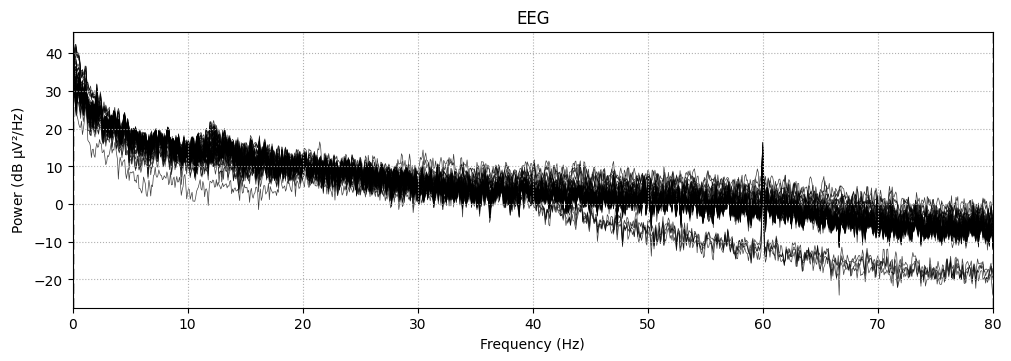

In [18]:
raw_sample.compute_psd().plot();



In [19]:
# Filter settings
low_cut = 0.1
hi_cut  = 30

raw_filt = raw_sample.copy().filter(low_cut, hi_cut)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 5281 samples (33.006 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<ipython-input-20-1f09ab49612f>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw_filt.compute_psd().plot()
<ipython-input-20-1f09ab49612f>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.compute_psd().plot()


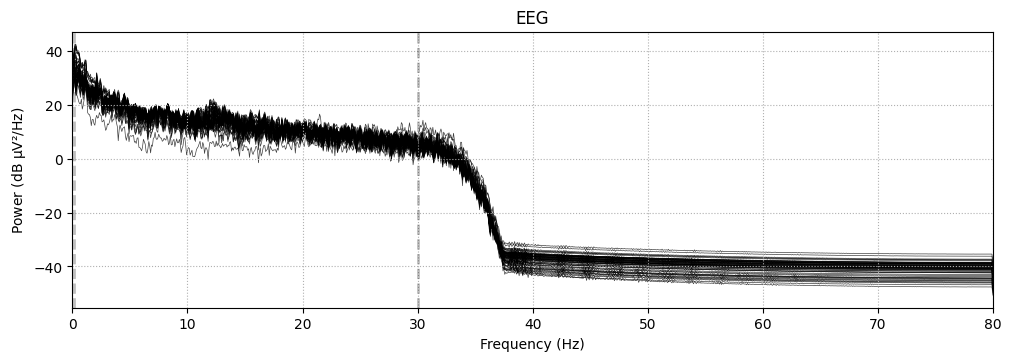

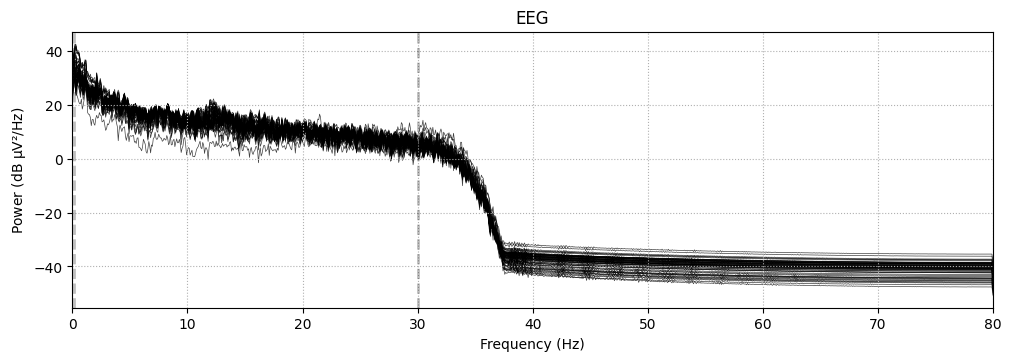

In [20]:
raw_filt.compute_psd().plot()

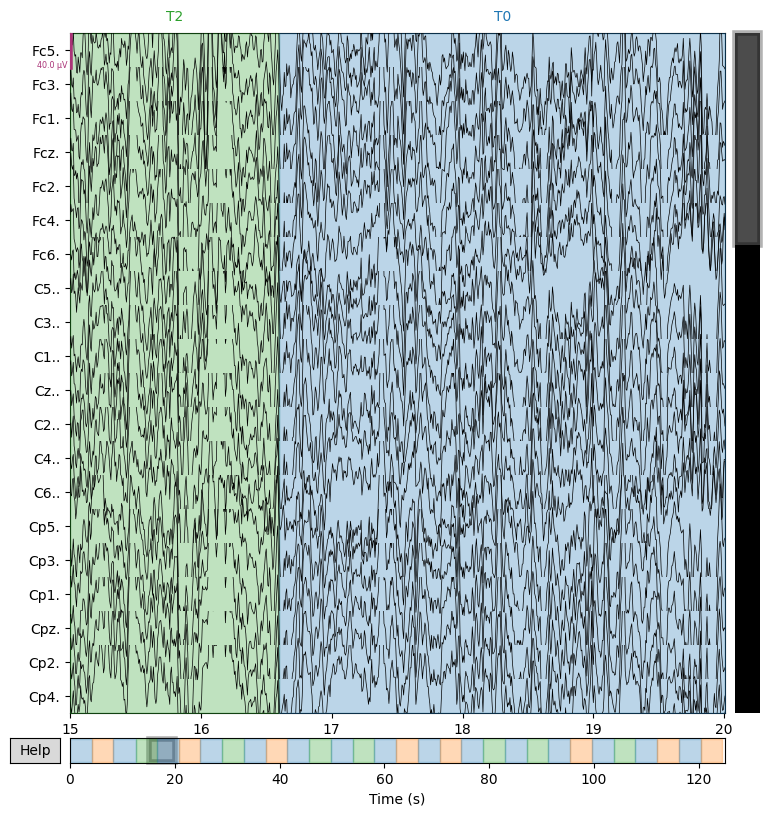

In [21]:
raw_sample.plot(start=15, duration=5);  # times are in seconds


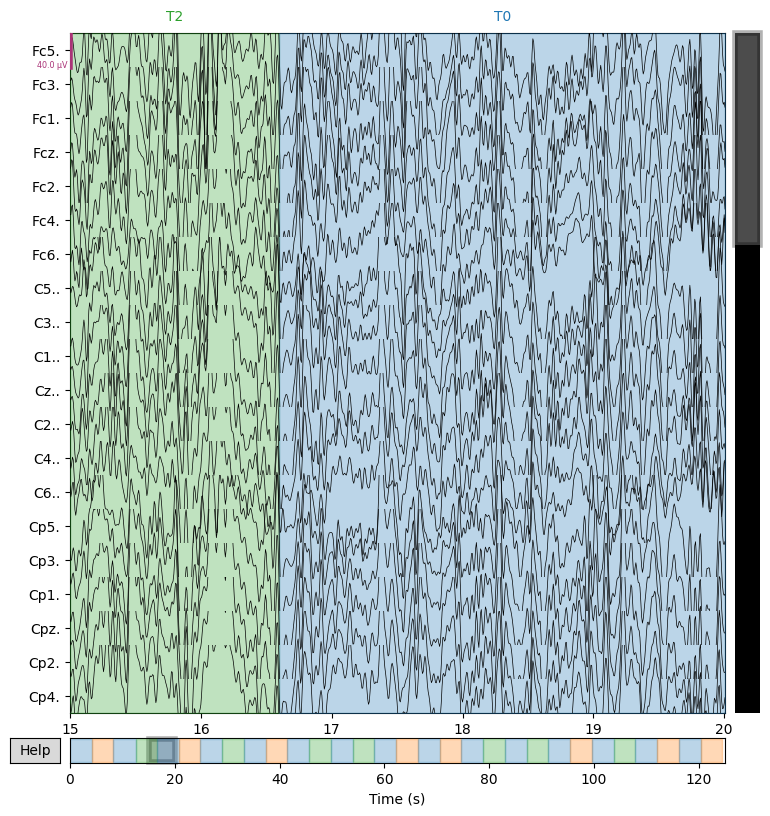

In [25]:
raw_filt.plot(start=15, duration=5);

In [26]:
mne.events_from_annotations(raw_sample)

Used Annotations descriptions: ['T0', 'T1', 'T2']


(array([[    0,     0,     1],
        [  672,     0,     2],
        [ 1328,     0,     1],
        [ 2000,     0,     3],
        [ 2656,     0,     1],
        [ 3328,     0,     2],
        [ 3984,     0,     1],
        [ 4656,     0,     3],
        [ 5312,     0,     1],
        [ 5984,     0,     2],
        [ 6640,     0,     1],
        [ 7312,     0,     3],
        [ 7968,     0,     1],
        [ 8640,     0,     3],
        [ 9296,     0,     1],
        [ 9968,     0,     2],
        [10624,     0,     1],
        [11296,     0,     2],
        [11952,     0,     1],
        [12624,     0,     3],
        [13280,     0,     1],
        [13952,     0,     3],
        [14608,     0,     1],
        [15280,     0,     2],
        [15936,     0,     1],
        [16608,     0,     3],
        [17264,     0,     1],
        [17936,     0,     2],
        [18592,     0,     1],
        [19264,     0,     2]]),
 {'T0': 1, 'T1': 2, 'T2': 3})